In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import comet_ml
from comet_ml import Experiment

In [3]:
import os,sys
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import CometLogger

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [5]:
sys.path.append('../training')
from manifoldembedder import *
from anomalymodels import *

In [6]:
basedir_toyreal = '/nobackup/users/sangeon/datasets/jets/jetpairs/realistic'

toyreal_dict = {'train':os.path.join(basedir_toyreal, 'realistic_jettrain_16part.pt'),
             'val':os.path.join(basedir_toyreal, 'realistic_jetval_16part.pt'),
             'test':os.path.join(basedir_toyreal, 'realistic_jettest_measureDistortion_16part.pt'),
             'predict':os.path.join(basedir_toyreal, 'realistic_jetpredict_16part.pt')}


toyreal = torch.load(os.path.join(basedir_toyreal, 'realistic_jettest_measureDistortion_16part.pt'))


jetreal_dm = JetDataModule(toyreal_dict,2500)


In [7]:
trainer = Trainer(gpus=1)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [8]:
embedder = ManifoldEmbedder.load_from_checkpoint("../training/realistictoyjets_checkpoints/Transformer-paper-April27-checkpoint-epoch=04-val_loss=0.29.ckpt")


In [18]:
embedder.eval()


ManifoldEmbedder(
  (encoder): particleTransformer(
    (embed_src): Linear(in_features=3, out_features=32, bias=True)
    (embed_tgt): Linear(in_features=3, out_features=32, bias=True)
    (pos_enc): PositionalEncoding(
      (dropout): Dropout(p=0.2, inplace=False)
    )
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): _LinearWithBias(in_features=32, out_features=32, bias=True)
          )
          (linear1): Linear(in_features=32, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=32, bias=True)
          (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): Tran

In [19]:
a = trainer.test(embedder, jetreal_dm)

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

start
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(


In [20]:
distortion = np.empty(0)
for batch in embedder.distortion_measure:
    distortion = np.concatenate([distortion,batch.cpu().numpy()])

In [21]:
distortion

array([0.30960119, 0.21462135, 0.04286816, ..., 0.0881576 , 0.053181  ,
       0.26962981])

In [22]:
max(distortion)

4.074134826660156

In [23]:
min(distortion)

0.0002864789275918156

In [24]:
np.mean(distortion)

0.5464490924154748

Text(0.5, 1.0, 'Realistic Toy Jet')

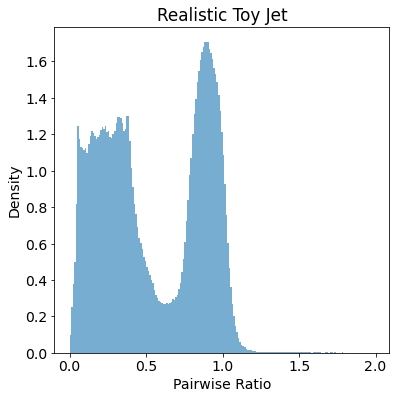

In [25]:
plt.hist(distortion, bins=np.arange(0,2,0.01),alpha=0.6, density=True,label='Realistic Toy Jet');

plt.xlabel("Pairwise Ratio")
plt.ylabel("Density")
#plt.yscale('log')



plt.title('Realistic Toy Jet')
#plt.legend()
#plt.savefig('../figures/paper/Distortion_RealisticToyJet_normalscale_v0.png')
#plt.savefig('../figures/paper/Distortion_RealisticToyJet_normalscale_v0.pdf')

In [48]:
embedder = ManifoldEmbedder.load_from_checkpoint("../training/simulatedtoyjets_checkpoints/Transformer-paper-finaltuning-try14-epoch=00-val_loss=0.27.ckpt")

In [49]:
#train_file_list = []
#val_file_list = []
#test_file_list = []
#predict_file_list = []

#basedir = '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs'

#for file in os.listdir(basedir):
#    if "testDistortion" in file:
#        test_file_list.append(os.path.join(basedir,file))

In [50]:
test_file_list[:3]

NameError: name 'test_file_list' is not defined

In [70]:
#test_list = []
#for file in test_file_list:
#    test_list.append(torch.load(file))
#jet_test = torch.utils.data.ConcatDataset(test_list)
#torch.save(jet_test, os.path.join(basedir, 'Gridpack_jetpair_test_measureDistortion_16part.pt'))


In [51]:
basedir_gridpack = '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs'

jetgridpack_dict = {'train':None,
             'val':None,
             'test':os.path.join(basedir_gridpack, 'Gridpack_jetpair_test_measureDistortion_16part.pt'),
             'predict':None}


#toyreal = torch.load(os.path.join(basedir_toyreal, 'realistic_jettest_measureDistortion_16part.pt'))


jetgridpack_dm = JetDataModule(jetgridpack_dict,2500)


In [52]:
trainer.test(embedder, jetgridpack_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

start
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


[{}]

In [55]:
distortion = np.empty(0)
for batch in embedder.distortion_measure:
    distortion = np.concatenate([distortion,batch.cpu().numpy()])

In [57]:
np.mean(distortion)

0.7377644364058095

In [58]:
np.std(distortion)

0.2304613132198867

In [59]:
normratio = distortion/np.mean(distortion)

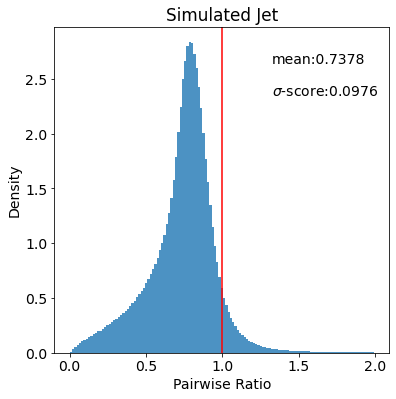

In [104]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(distortion, bins=np.arange(0,2,0.015),alpha=0.8, density=True,label='Simulated Jet')
ax.text(0.65, 0.9, f'mean:{np.mean(distortion):.4f}', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.text(0.65, 0.8, fr'$\sigma$-score:{np.var(normratio):.4f}', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.axvline(1.0, c='red')
ax.set_xlabel("Pairwise Ratio")
ax.set_ylabel("Density")
#plt.yscale('log')
ax.set_title('Simulated Jet')
#ax.legend()
plt.savefig('../figures/paper/Distortion_SimulatedJet_Final_v0.png')
plt.savefig('../figures/paper/Distortion_SimulatedJet_Final_v0.pdf')

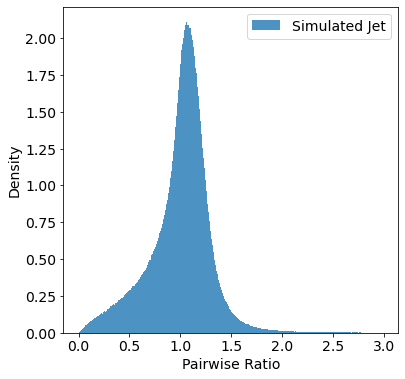

In [61]:
plt.hist(normratio, bins=np.arange(0,3,0.01),alpha=0.8, density=True,label='Simulated Jet')

plt.xlabel("Pairwise Ratio")
plt.ylabel("Density")
#plt.yscale('log')
#plt.title('Distortion Simulated Jet')
plt.legend()

In [91]:
interpolate_test_file_list = []

basedir = '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs'

for file in os.listdir(basedir):
    if "interpolateDistortion" in file:
        interpolate_test_file_list.append(os.path.join(basedir,file))

In [92]:
interpolate_test_file_list

['/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_interpolateDistortion_16part_18.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_interpolateDistortion_16part_5.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_interpolateDistortion_16part_13.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_interpolateDistortion_16part_19.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_interpolateDistortion_16part_9.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_interpolateDistortion_16part_7.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_interpolateDistortion_16part_23.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_interpolateDistortion_16part_11.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_interpolateDistortion_16part_17.pt',
 '/nobackup/u

In [93]:
interpolate_list = []
for file in interpolate_test_file_list:
    interpolate_list.append(torch.load(file))
jet_test = torch.utils.data.ConcatDataset(interpolate_list)
torch.save(jet_test, os.path.join(basedir, 'Gridpack_jetpair_test_interpolateDistortion_16part.pt'))


In [94]:
basedir_gridpack = '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs'

jetgridpack_dict = {'train':None,
             'val':None,
             'test':os.path.join(basedir_gridpack, 'Gridpack_jetpair_test_interpolateDistortion_16part.pt'),
             'predict':None}


#toyreal = torch.load(os.path.join(basedir_toyreal, 'realistic_jettest_measureDistortion_16part.pt'))


jetgridpack_dm = JetDataModule(jetgridpack_dict,2500)


In [95]:
trainer.test(embedder, jetgridpack_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

start
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


[{}]

In [98]:
distortion2 = np.empty(0)
for batch in embedder.distortion_measure:
    distortion2 = np.concatenate([distortion2,batch.cpu().numpy()])

In [100]:
normratio2 = distortion2/np.mean(distortion2)

In [102]:
np.mean(normratio2)

0.9999999999999997

Text(0.5, 1.0, 'Simulated Jet - Interpolate')

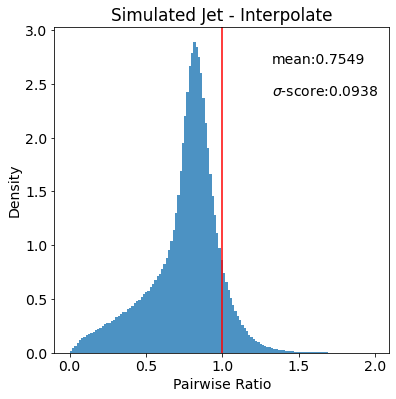

In [103]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(distortion2, bins=np.arange(0,2,0.015),alpha=0.8, density=True,label='Simulated Jet')
ax.text(0.65, 0.9, f'mean:{np.mean(distortion2):.4f}', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.text(0.65, 0.8, fr'$\sigma$-score:{np.var(normratio2):.4f}', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.axvline(1.0, c='red')
ax.set_xlabel("Pairwise Ratio")
ax.set_ylabel("Density")
#plt.yscale('log')
ax.set_title('Simulated Jet - Interpolate')
#ax.legend()
#plt.savefig('../figures/paper/Distortion_SimulatedJet_normalscale.png')
#plt.savefig('../figures/paper/Distortion_SimulatedJet_normalscale.pdf')